<a href="https://colab.research.google.com/github/valerialrc/ufv/blob/main/ELT575/ELT575_Semana4_89397.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Importando dados

Aqui usaremos o dataset cifar10 (https://www.tensorflow.org/datasets/catalog/cifar10?hl=pt-br). O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas 32x32 em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [ ]:
# carregando dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

Faremos algumas adequações para que os dados sejam usados no modelo de CNN. Basicamente, colocamos os valores dos pixels em uma escala de 0 a 1, visto que os valores originais dos pixels das imagens correspondem a uma escala de 0 a 255. Também transformamos nossa variável alvo em uma codificação one-hos

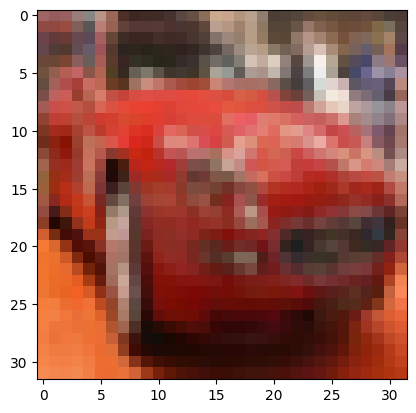

In [ ]:
plt.imshow(trainX[5], cmap='gray');

In [ ]:
# fazendo um reshape no dataset para ter um único canal
trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))

# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Construindo o modelo

O modelo usado será bem simples:
* Uma única camada convolucional com 32 filtros de tamanho 3 x 3 e função de ativação ReLU
* Camada MaxPooling para redução de dimensionalidade
* Transformação do resultado em um vetor
* Camada totalmente conectada com 100 neurônios e função de ativação ReLU
* Camada de saída softmax para estimar a probabilidade da entrada da rede pertencer a cada uma das 10 classes (dígitos 0 a 9)


Para treinamento do modelo, usaremos o algoritmo de otimização clássico do gradiente descendente estocástico (SDG), com a função objetiva como a entropia cruzada categórica. Nossa principal métrica de desempenho será a acurácia

In [ ]:
# definindo modelo
def define_model():
    # Carregamos o modelo VGG16 sem as últimas camadas totalmente conectadas (include_top=False)
  pre_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

  # Aqui fazemos com que as camadas do modelo pré-treinado não sejam alteradas durante o treino
  for layer in pre_model.layers:
    layer.trainable = False

  # Criamos então um modelo sequential onde temos o VGG16 seguido das novas camadas conectadas
  model = Sequential()

  model.add(pre_model)
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(100, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(50, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(10, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(10, activation='softmax'))

  opt = Adam(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

# Treinamento do modelo

O treinamento será realizado usando o método da validação cruzada k-partições (k-fold) com k=5. Tal validação cruzada faz a divisão dos dados em 5 grupos de tamanho igual, sendo realizadas 5 treinamentos distintos. A cada treinamento, 4 grupos de dados são utilizados para treinar o modelo e o grupo remanescente é usado para teste do desempenho do modelo treinado.



* O principal intuito da validação k-fold é acessar a incerteza do desempenho do modelo

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.2500 - loss: 2.1177 - val_accuracy: 0.4925 - val_loss: 1.4606
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4094 - loss: 1.6688 - val_accuracy: 0.5222 - val_loss: 1.3766
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4490 - loss: 1.5878 - val_accuracy: 0.5395 - val_loss: 1.3530
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4471 - loss: 1.5858 - val_accuracy: 0.5496 - val_loss: 1.3179
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4760 - loss: 1.5364 - val_accuracy: 0.5595 - val_loss: 1.2840
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4827 - loss: 1.5131 - val_accuracy: 0.5580 - val_loss: 1.2811
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4799 - loss: 1.5080 - val_accuracy: 0.5650 - val_loss: 1.2758
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4880 - l

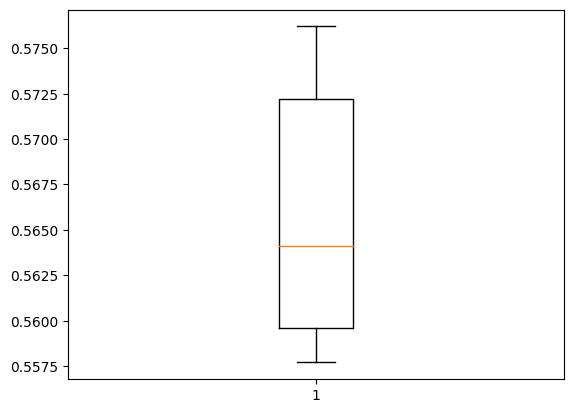

CPU times: user 10min 35s, sys: 22.4 s, total: 10min 58s
Wall time: 14min 8s


In [ ]:
%%time
scores = []
histories = []

# definindo a validação k-fold
kfold = KFold(5, shuffle=True, random_state=1)

# loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
for train_ix, test_ix in kfold.split(trainX):

  model = define_model()

  # recorta dados de acordo com índices da k-fold
  train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

  # treinamento do modelo
  history = model.fit(train_data, train_target,
                      epochs=10, batch_size=32,
                      validation_data=(val_data, val_target),
                      verbose=1)

  # desempenho do modelo
  _, acc = model.evaluate(val_data, val_target, verbose=0)
  print('> %.3f' % (acc * 100.0))

  # armazena resultados de cada modelo treinado dentro da k-fold
  scores.append(acc)
  histories.append(history)

print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
plt.boxplot(scores)
plt.show()

# Testando modelo no conjunto de teste

Agora avaliaremos o desempenho do modelo em dados do conjunto de teste separado nas etapas iniciais deste exercício
* Abaixo temos a primeira imagem do conjunto de teste

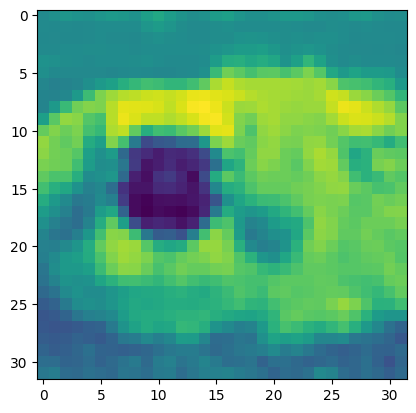

In [ ]:
plt.imshow(testX[31,:,:,0]);

Usaremos o último modelo treinado na validação cruzada k-fold para classificar qual número temos na imagem (podemos também salvar cada um dos modelos intermediários e usar o que apresentar maior performance ou fazer um comitê de votação com os 5 modelos disponíveis)

* temos que fazer uma expansão de dimensão para que nossa imagem tenha um formato 1 x 28 x 28 x 1. Isso é necessário pois treinamos nosso modelo usando mini conjuntos de imagens (como nosso batch size era de 32, o formato passado para o modelo a cada passo de treinamento era 32 x 28 x 28 x 1)

In [ ]:
np.argmax(model.predict(np.expand_dims(testX[31], axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


5

# Resultados

O modelo com Transfer Learning começou com uma acurácia mais baixa, devido ao modelo pré-treinado precisar se ajustar ao novo conjunto de dados. Ao final, o modelo com Transfer Learning também retornou uma acurácia um pouco menor, porém os valores da função de perda são mais controlados que os do modelo anterior e o valor final é menor, o que indica um menor risco de overfitting.

Os dados podem ser conferidos na [Atividade da Semana 2](https://colab.research.google.com/drive/1f03GAv0trFU9AY9Sb1Oy2impHLB8Ygdu?usp=sharing).

Quanto ao tempo de treinamento, o modelo com Transfer Learning demorou quase 10 minutos a mais.

* Modelo anterior:
  * CPU times: user 3min 38s, sys: 19.2 s, total: 3min 57s
  * Wall time: 4min 27s

* Modelo com Tranfer Learning:
  * CPU times: user 10min 35s, sys: 22.4 s, total: 10min 58s
  * Wall time: 14min 8s

O motivo principal para o aumento do tempo de treinamento é que apesar de o modelo VGG16 que está sendo usado aproveitar parâmetros pré-treinados para não precisar treinar todas as camadas do novo modelo do zero, ele ainda precisa realizar cálculos e processar as entradas através de sua rede complexa para adaptar o modelo ao novo conjunto de dados. Assim, a latência na comunicação dos dados torna-se maior porque o modelo requer maior poder computacional.

Para obter resultados melhores alguns ajustes finos no treinamento podem ser feitos, como a alteração do número de épocas ou do valor k-fold da validação cruzada.